In [1]:
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:
#Read the file 
stockData = pd.read_csv("stock_data_large.csv")

#Display first 10 rows 
stockData.head(10)

,Date,Open,High,Low,Close,Volume
0,2015-01-01,373.44,404.73,345.87,349.57,2134615
1,2015-01-02,197.08,218.12,184.58,212.99,4240443
2,2015-01-05,399.27,419.56,357.80,383.83,2429851
3,2015-01-06,165.49,196.80,160.93,168.81,1353820
4,2015-01-07,441.49,475.20,420.16,467.26,2264712
5,2015-01-08,241.69,267.69,194.61,204.63,2022822
6,2015-01-09,446.21,476.70,433.34,469.07,1978605
7,2015-01-12,408.87,437.96,369.22,384.37,2092242
8,2015-01-13,147.74,181.69,126.48,138.57,443688
9,2015-01-14,482.26,507.06,473.29,499.57,4390780


In [5]:
#Check if there are any null values in any of the columns 
stockData.isnull().any()

Date      False
Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [9]:
#Convert the Date column to proper timeframe objects 
stockData["Date"] = pd.to_datetime(stockData["Date"], format="%Y-%m-%d")

#View first 10 rows
stockData.head(10)

,Date,Open,High,Low,Close,Volume
0,2015-01-01,373.44,404.73,345.87,349.57,2134615
1,2015-01-02,197.08,218.12,184.58,212.99,4240443
2,2015-01-05,399.27,419.56,357.80,383.83,2429851
3,2015-01-06,165.49,196.80,160.93,168.81,1353820
4,2015-01-07,441.49,475.20,420.16,467.26,2264712
5,2015-01-08,241.69,267.69,194.61,204.63,2022822
6,2015-01-09,446.21,476.70,433.34,469.07,1978605
7,2015-01-12,408.87,437.96,369.22,384.37,2092242
8,2015-01-13,147.74,181.69,126.48,138.57,443688
9,2015-01-14,482.26,507.06,473.29,499.57,4390780


In [10]:
#confirm the type of date time object
type(stockData["Date"].loc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [12]:
#sort the data by date 
stockData = stockData.sort_values(by="Date")

#view the first 10 rows in the dataframe
stockData.head(10)

,Date,Open,High,Low,Close,Volume
0,2015-01-01,373.44,404.73,345.87,349.57,2134615
1,2015-01-02,197.08,218.12,184.58,212.99,4240443
2,2015-01-05,399.27,419.56,357.80,383.83,2429851
3,2015-01-06,165.49,196.80,160.93,168.81,1353820
4,2015-01-07,441.49,475.20,420.16,467.26,2264712
5,2015-01-08,241.69,267.69,194.61,204.63,2022822
6,2015-01-09,446.21,476.70,433.34,469.07,1978605
7,2015-01-12,408.87,437.96,369.22,384.37,2092242
8,2015-01-13,147.74,181.69,126.48,138.57,443688
9,2015-01-14,482.26,507.06,473.29,499.57,4390780


In [15]:
#A new column is created "PriceChange" to compute difference between high and low
stockData["PriceChange"] = stockData.apply(lambda row : (row['High'] - row['Low']), axis=1)

#Check the dataframe
stockData.head(10)

,Date,Open,High,Low,Close,Volume,PriceChange
0,2015-01-01,373.44,404.73,345.87,349.57,2134615,58.86
1,2015-01-02,197.08,218.12,184.58,212.99,4240443,33.54
2,2015-01-05,399.27,419.56,357.80,383.83,2429851,61.76
3,2015-01-06,165.49,196.80,160.93,168.81,1353820,35.87
4,2015-01-07,441.49,475.20,420.16,467.26,2264712,55.04
5,2015-01-08,241.69,267.69,194.61,204.63,2022822,73.08
6,2015-01-09,446.21,476.70,433.34,469.07,1978605,43.36
7,2015-01-12,408.87,437.96,369.22,384.37,2092242,68.74
8,2015-01-13,147.74,181.69,126.48,138.57,443688,55.21
9,2015-01-14,482.26,507.06,473.29,499.57,4390780,33.77


In [18]:
#percentage change in the close value foreach day from previous day 
stockData["PercentageChange"] = (stockData["Close"] - stockData["Close"].shift(1))/stockData["Close"].shift(1)*100

#check the dataframe
stockData.head(10)

,Date,Open,High,Low,Close,Volume,PriceChange,PercentageChange
0,2015-01-01,373.44,404.73,345.87,349.57,2134615,58.86,NaN
1,2015-01-02,197.08,218.12,184.58,212.99,4240443,33.54,-39.070858
2,2015-01-05,399.27,419.56,357.80,383.83,2429851,61.76,80.210339
3,2015-01-06,165.49,196.80,160.93,168.81,1353820,35.87,-56.019592
4,2015-01-07,441.49,475.20,420.16,467.26,2264712,55.04,176.796398
5,2015-01-08,241.69,267.69,194.61,204.63,2022822,73.08,-56.206395
6,2015-01-09,446.21,476.70,433.34,469.07,1978605,43.36,129.228363
7,2015-01-12,408.87,437.96,369.22,384.37,2092242,68.74,-18.057006
8,2015-01-13,147.74,181.69,126.48,138.57,443688,55.21,-63.948799
9,2015-01-14,482.26,507.06,473.29,499.57,4390780,33.77,260.518150


In [20]:
#Calucate 5 day moving average 
stockData["FiveDay"] = stockData["Close"].rolling(window=5).mean()

#Calucate 10 day moving average 
stockData["TenDay"] = stockData["Close"].rolling(window=10).mean()

#Check the dataframe 
stockData.head(10)


,Date,Open,High,Low,Close,Volume,PriceChange,PercentageChange,FiveDay,TenDay
0,2015-01-01,373.44,404.73,345.87,349.57,2134615,58.86,NaN,NaN,NaN
1,2015-01-02,197.08,218.12,184.58,212.99,4240443,33.54,-39.070858,NaN,NaN
2,2015-01-05,399.27,419.56,357.80,383.83,2429851,61.76,80.210339,NaN,NaN
3,2015-01-06,165.49,196.80,160.93,168.81,1353820,35.87,-56.019592,NaN,NaN
4,2015-01-07,441.49,475.20,420.16,467.26,2264712,55.04,176.796398,316.492,NaN
5,2015-01-08,241.69,267.69,194.61,204.63,2022822,73.08,-56.206395,287.504,NaN
6,2015-01-09,446.21,476.70,433.34,469.07,1978605,43.36,129.228363,338.720,NaN
7,2015-01-12,408.87,437.96,369.22,384.37,2092242,68.74,-18.057006,338.828,NaN
8,2015-01-13,147.74,181.69,126.48,138.57,443688,55.21,-63.948799,332.780,NaN
9,2015-01-14,482.26,507.06,473.29,499.57,4390780,33.77,260.518150,339.242,327.867


In [23]:
#replace all the null values with the zero
stockData = stockData.fillna(0)

#check the dataframe
stockData.head(10) 

,Date,Open,High,Low,Close,Volume,PriceChange,PercentageChange,FiveDay,TenDay
0,2015-01-01,373.44,404.73,345.87,349.57,2134615,58.86,0.000000,0.000,0.000
1,2015-01-02,197.08,218.12,184.58,212.99,4240443,33.54,-39.070858,0.000,0.000
2,2015-01-05,399.27,419.56,357.80,383.83,2429851,61.76,80.210339,0.000,0.000
3,2015-01-06,165.49,196.80,160.93,168.81,1353820,35.87,-56.019592,0.000,0.000
4,2015-01-07,441.49,475.20,420.16,467.26,2264712,55.04,176.796398,316.492,0.000
5,2015-01-08,241.69,267.69,194.61,204.63,2022822,73.08,-56.206395,287.504,0.000
6,2015-01-09,446.21,476.70,433.34,469.07,1978605,43.36,129.228363,338.720,0.000
7,2015-01-12,408.87,437.96,369.22,384.37,2092242,68.74,-18.057006,338.828,0.000
8,2015-01-13,147.74,181.69,126.48,138.57,443688,55.21,-63.948799,332.780,0.000
9,2015-01-14,482.26,507.06,473.29,499.57,4390780,33.77,260.518150,339.242,327.867


In [28]:
#store the year in the seperate column
stockData["Year"] = pd.DatetimeIndex(stockData["Date"]).year

#Check the dataframe
stockData.head(10)

,Date,Open,High,Low,Close,Volume,PriceChange,PercentageChange,FiveDay,TenDay,Year
0,2015-01-01,373.44,404.73,345.87,349.57,2134615,58.86,0.000000,0.000,0.000,2015
1,2015-01-02,197.08,218.12,184.58,212.99,4240443,33.54,-39.070858,0.000,0.000,2015
2,2015-01-05,399.27,419.56,357.80,383.83,2429851,61.76,80.210339,0.000,0.000,2015
3,2015-01-06,165.49,196.80,160.93,168.81,1353820,35.87,-56.019592,0.000,0.000,2015
4,2015-01-07,441.49,475.20,420.16,467.26,2264712,55.04,176.796398,316.492,0.000,2015
5,2015-01-08,241.69,267.69,194.61,204.63,2022822,73.08,-56.206395,287.504,0.000,2015
6,2015-01-09,446.21,476.70,433.34,469.07,1978605,43.36,129.228363,338.720,0.000,2015
7,2015-01-12,408.87,437.96,369.22,384.37,2092242,68.74,-18.057006,338.828,0.000,2015
8,2015-01-13,147.74,181.69,126.48,138.57,443688,55.21,-63.948799,332.780,0.000,2015
9,2015-01-14,482.26,507.06,473.29,499.57,4390780,33.77,260.518150,339.242,327.867,2015


In [30]:
#aggregate of total volume by the year
yearly_volume = stockData.groupby("Year").agg({'Volume' : 'sum'})

#check the new dataframe
yearly_volume

,Volume
Year,
2015,613823155
2016,680956608
2017,674741007
2018,638576717
2019,690610565
2020,691817256
2021,680247106
2022,685199166
2023,660238229


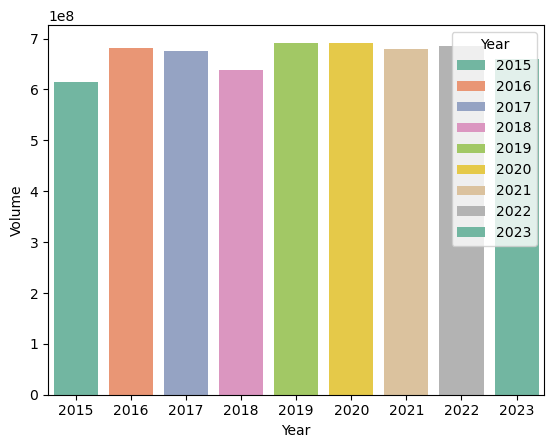

In [35]:
#plot the graph
sns.barplot(data = yearly_volume, x = "Year", y = "Volume", palette="Set2", hue = "Year")
plt.show()

In [38]:
#day with the highest trading volume 
stockData.loc[stockData["Volume"] == stockData["Volume"].max()]

,Date,Open,High,Low,Close,Volume,PriceChange,PercentageChange,FiveDay,TenDay,Year
1235,2019-09-26,162.54,208.69,147.02,206.51,4998804,61.67,15.659479,281.378,286.263,2019


In [39]:
#days with price change higher than five percent 
stockData.loc[stockData["PercentageChange"] >= 5]

,Date,Open,High,Low,Close,Volume,PriceChange,PercentageChange,FiveDay,TenDay,Year
2,2015-01-05,399.27,419.56,357.80,383.83,2429851,61.76,80.210339,0.000,0.000,2015
4,2015-01-07,441.49,475.20,420.16,467.26,2264712,55.04,176.796398,316.492,0.000,2015
6,2015-01-09,446.21,476.70,433.34,469.07,1978605,43.36,129.228363,338.720,0.000,2015
9,2015-01-14,482.26,507.06,473.29,499.57,4390780,33.77,260.518150,339.242,327.867,2015
12,2015-01-19,357.24,365.62,321.71,327.73,4745016,43.91,6.731583,324.872,331.850,2015
...,...,...,...,...,...,...,...,...,...,...,...
2331,2023-12-08,469.93,509.30,439.52,478.54,863385,69.78,337.742408,359.950,290.925,2023
2334,2023-12-13,313.74,360.83,304.77,339.33,3568455,56.06,118.908458,259.072,298.679,2023
2337,2023-12-18,368.67,392.96,361.41,378.16,4619441,31.55,121.638729,263.544,291.975,2023
2340,2023-12-21,410.29,459.34,370.14,389.82,4661031,89.20,145.772650,273.520,282.824,2023


In [44]:
#new column day type to define if the day is 'Bullish' or 'Bearish'ArithmeticError
stockData["DayType"] = stockData.apply(lambda row : ( "Bullish" if row["Open"] > row["Close"] else  "Bearish"), axis=1)

#check the dataframe 
stockData.head(10)

,Date,Open,High,Low,Close,Volume,PriceChange,PercentageChange,FiveDay,TenDay,Year,DayType
0,2015-01-01,373.44,404.73,345.87,349.57,2134615,58.86,0.000000,0.000,0.000,2015,Bullish
1,2015-01-02,197.08,218.12,184.58,212.99,4240443,33.54,-39.070858,0.000,0.000,2015,Bearish
2,2015-01-05,399.27,419.56,357.80,383.83,2429851,61.76,80.210339,0.000,0.000,2015,Bullish
3,2015-01-06,165.49,196.80,160.93,168.81,1353820,35.87,-56.019592,0.000,0.000,2015,Bearish
4,2015-01-07,441.49,475.20,420.16,467.26,2264712,55.04,176.796398,316.492,0.000,2015,Bearish
5,2015-01-08,241.69,267.69,194.61,204.63,2022822,73.08,-56.206395,287.504,0.000,2015,Bullish
6,2015-01-09,446.21,476.70,433.34,469.07,1978605,43.36,129.228363,338.720,0.000,2015,Bearish
7,2015-01-12,408.87,437.96,369.22,384.37,2092242,68.74,-18.057006,338.828,0.000,2015,Bullish
8,2015-01-13,147.74,181.69,126.48,138.57,443688,55.21,-63.948799,332.780,0.000,2015,Bullish
9,2015-01-14,482.26,507.06,473.29,499.57,4390780,33.77,260.518150,339.242,327.867,2015,Bearish
